In [1]:
! tree -h ../sample_data/trial_0

../sample_data/trial_0
├── [ 16K]  degree_histogram.png
├── [ 252]  edges.csv
├── [ 26K]  force_directed.png
├── [ 412]  mapping.csv
├── [  24]  seed.txt
├── [ 16K]  spectral.png
├── [ 155]  summary.txt
├── [102K]  top_pagview.png
└── [ 19K]  ts.csv

0 directories, 9 files


In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

mapping = pd.read_csv("../sample_data/trial_0/mapping.csv")
ts = pd.read_csv("../sample_data/trial_0/ts.csv")
g = nx.from_pandas_edgelist(
    pd.read_csv('../sample_data/trial_0/edges.csv'), 
    source="src", 
    target="dst",
    edge_attr="weight",
    create_using=nx.DiGraph
)

In [3]:
mapping.head()

,id,title,is_redirect,is_new,pagerank
0,27488916,Jessica_Caban,False,False,1.463946
1,27005455,Bruno_Mars,False,False,1.093417
2,26592001,Model_Latina,False,False,0.960024
3,37825120,When_I_Was_Your_Man,False,False,0.931929
4,8721827,Caban,False,False,0.850228


In [4]:
df = pd.merge(mapping[["id", "pagerank", "title"]], ts, on="id")
df.head()

,id,pagerank,title,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,...,2019-08-23,2019-08-24,2019-08-25,2019-08-26,2019-08-27,2019-08-28,2019-08-29,2019-08-30,2019-08-31,2019-09-01
0,27488916,1.463946,Jessica_Caban,288.0,327.0,353.0,1521.0,1645.0,1153.0,1085.0,...,109.0,NaN,NaN,119.0,134.0,148.0,110.0,118.0,NaN,NaN
1,27005455,1.093417,Bruno_Mars,2908.0,3134.0,3332.0,14413.0,14031.0,10218.0,9322.0,...,1355.0,1107.0,1082.0,1396.0,1574.0,1534.0,1471.0,1329.0,1101.0,1070.0
2,26592001,0.960024,Model_Latina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37825120,0.931929,When_I_Was_Your_Man,NaN,108.0,NaN,143.0,156.0,151.0,106.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11513656,0.850228,Jessica_(given_name),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns[3:]

Index(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
       '2018-01-06', '2018-01-07', '2018-01-08', '2018-01-09', '2018-01-10',
       ...
       '2019-08-23', '2019-08-24', '2019-08-25', '2019-08-26', '2019-08-27',
       '2019-08-28', '2019-08-29', '2019-08-30', '2019-08-31', '2019-09-01'],
      dtype='object', length=608)

In [6]:
df.title[:5].values

array(['Jessica_Caban', 'Bruno_Mars', 'Model_Latina',
       'When_I_Was_Your_Man', 'Jessica_(given_name)'], dtype=object)

In [7]:
df.columns[:3]

Index(['id', 'pagerank', 'title'], dtype='object')

/Users/amiyaguchi/.local/share/virtualenvs/wiki-forecast-HU65IRGn/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


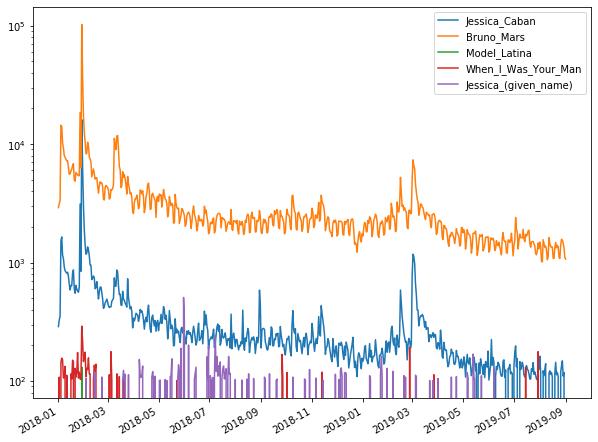

In [8]:
k = 5
dates = pd.to_datetime(df.columns[3:])
labels = df.title[:k].values
X = df.iloc[:k,3:].fillna(0).values.T

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(dates, X)
plt.yscale("log")
ax.legend(labels)
fig.autofmt_xdate()

In [9]:
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 7
Number of edges: 11
Average in degree:   1.5714
Average out degree:   1.5714


/Users/amiyaguchi/.local/share/virtualenvs/wiki-forecast-HU65IRGn/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/amiyaguchi/.local/share/virtualenvs/wiki-forecast-HU65IRGn/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


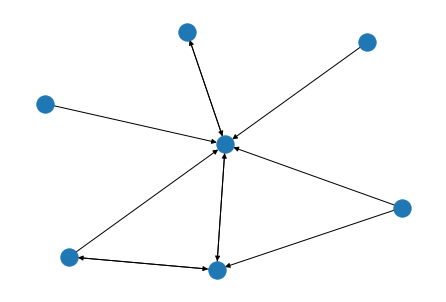

In [10]:
nx.draw(g)

TypeError: '>' not supported between instances of 'numpy.ndarray' and 'str'

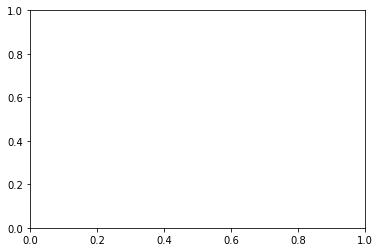

In [27]:
plt.spy(nx.adjacency_matrix(g), 'ro')

In [11]:
X = ts.iloc[:,1:].fillna(0).values
X

array([[ 288.,  327.,  353., ...,  118.,    0.,    0.],
       [2908., 3134., 3332., ..., 1329., 1101., 1070.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,  108.,    0., ...,    0.,    0.,    0.],
       [ 223.,  125.,  135., ...,    0.,  241.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.998613   0.00114774]
[123436.85757129   4184.73865067]


In [13]:
reduced = pca.fit_transform(X)

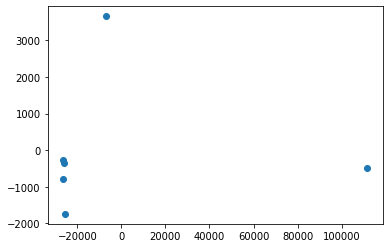

In [14]:
x, y = map(list, zip(*reduced))
plt.scatter(x, y)